In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import os
from pathlib import Path


from dask.distributed import Client
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38797 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/38797/status,
Dashboard: /proxy/38797/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46539,Workers: 4
Dashboard: /proxy/38797/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:40519,Total threads: 2
Dashboard: /proxy/45379/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:38505,


0.3.0


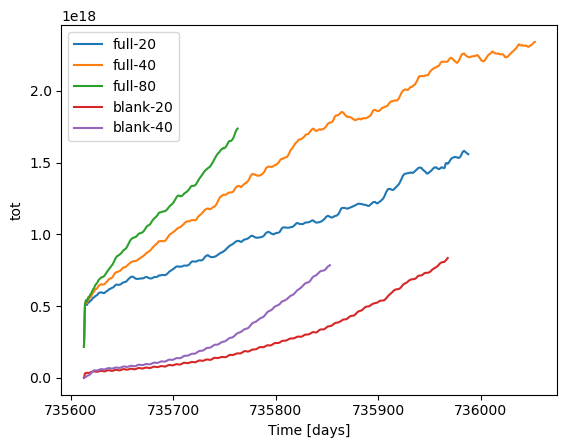

In [2]:
stats = {}
expts = ["full-20","full-40","full-80","blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)
    plt.legend()

0.3.0


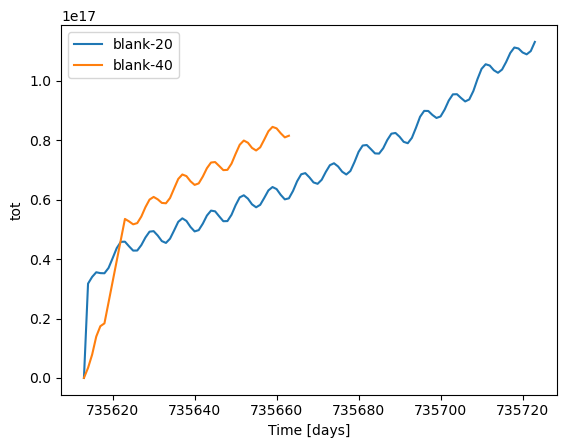

In [2]:
stats = {}
expts = ["blank-20","blank-40"]
for i in expts:
    try:
        temp = xr.open_mfdataset(
            [str(j) for j in (Path("/g/data/nm03/ab8992/outputs") / i).glob("output*/ocean_stats.nc")],decode_times = False
        )

        stats[i]  = xr.Dataset(
            {
                "KE": temp.KE.sum("Layer"),
                "PE": temp.APE.sum("Interface"),
                "tot": temp.KE.sum("Layer") + temp.APE.sum("Interface")
            }
        )
        # Modify Time coordinate of stats[i]


        # stats[i].coords["Time"][:].values -= 735600
    except Exception as e:
        print(i)
        print(e)
        pass
for i in expts:
    stats[i].tot.plot(label=i)

plt.legend()

## Spinup in our region only


In [2]:
expts = ["full-20","full-40","full-80"]
# expts = ["blank-40"]


for i in expts:
    ke = xr.open_mfdataset(
        f"/g/data/nm03/ab8992/postprocessed/{i}/ke_timeseries.nc",decode_times = False,parallel=True
    )
    ke.plot(legend = "i")
    plt.legend()



ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [ ]:
ke.values

: 